In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from spyre import server

# 1. File Loading -File Loading

In [8]:
file_names = ['WineDotCom.csv', 'TotalWine.csv']

In [23]:
def load_data(file_names):
    df_dict = {}
    for f in file_names:
        key = f.split('.')[0]
        df_dict[key] = pd.read_csv(f, encoding='latin-1')
    return df_dict

In [24]:
df_dict = load_data(file_names)

# 2. Statistical Analysis

In [38]:
def get_groupby_counts(df, groups):
    result = df.groupby(groups).count()
    return result

In [39]:
def drop_columns(df, column_names):
    df = df.drop(column_names, axis = 1)
    return df

## Varietal & Taste Analysis - Linqi

In [43]:
df = drop_columns(df_dict['WineDotCom'], ['Shopping_Link','Img_src'])
result_varietal = get_groupby_counts(df, ['Varietal'])
result_varietal

,Unnamed: 0,Title,Year,Price,Region,Country,Score_WS,Score_RP,Score_W&S,Score_JH,...,Score_WE,Score_WW,Score_BH,Score_JS,Score_TP,Score_D,Score_V,Score_JD,StarRating,numRater
Varietal,,,,,,,,,,,,,,,,,,,,,
Aglianico,21,21,21,21,12,21,7,2,0,0,...,3,0,0,2,0,0,0,0,21,21
Albarino,77,77,77,77,69,77,2,9,0,0,...,5,4,0,4,0,1,0,1,77,77
Aligote,2,2,2,2,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
Arneis,21,21,21,21,21,21,3,3,0,0,...,0,0,0,0,0,0,1,0,21,21
Assyrtiko,7,7,7,7,7,7,0,1,0,0,...,1,0,0,0,0,0,0,0,7,7
Barbera,71,71,71,71,67,71,10,4,0,0,...,7,2,0,9,0,0,3,0,71,71
Bonarda,17,17,17,17,15,17,0,2,0,0,...,1,0,0,1,1,0,0,0,17,17
Bordeaux Red Blends,1179,1179,1178,1179,1145,1179,586,780,0,2,...,534,71,0,702,13,371,146,256,1179,1179
Bordeaux White Blends,72,72,72,72,67,72,19,35,0,1,...,24,1,0,39,0,24,7,13,72,72


In [59]:
#Cross Tab Varietal VS Country
pd.crosstab(df.Varietal, df.Country, margins=True)
type(pd.crosstab(df.Varietal, df.Country, margins=True))

pandas.core.frame.DataFrame

In [60]:
pd.crosstab(df.Varietal, df.Year, margins=True)
type(pd.crosstab(df.Varietal, df.Year, margins=True))

pandas.core.frame.DataFrame

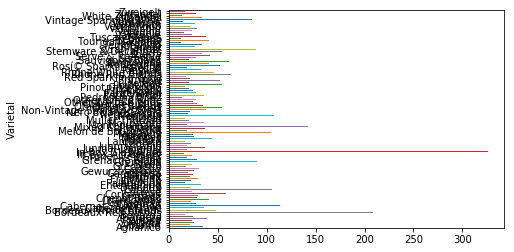

In [64]:
varietal_price = df.groupby(['Varietal']).Price.mean()
type(varietal_price)
varietal_price.plot.barh()

## Year Analysis -Zhang Chi

## Region & Country Analysis - Zhang Chi

## Professional Ratings Analysis - Jiaxin

## Buyers Ratings Analysis - Jiaxin

# 3. Introduction

In [96]:
#View description of varietal
all_files = os.listdir("Varietal/") #suppose you are one directory above test dir
print(all_files)
txt_files = filter(lambda x: x[-4:] == '.txt', all_files) #filter out all the text files 
print(txt_files)
varietal_files = list(txt_files)

['Sherry.txt', 'Semillon.txt', 'Arneis.txt']


In [97]:
varietal_files

['Sherry.txt', 'Semillon.txt', 'Arneis.txt']

In [98]:
os.chdir("Varietal/")
varietal_intro = {}
for f in varietal_files :
    with open(f, 'r') as file:
        varietal_intro[f] = file.read()

In [99]:
varietal_intro['Sherry.txt']

'Dessert, Sherry & Port\nEnd a great meal on a sweet note, dessert and fortified wines come in an impressive array of styles and sweetness levels. Many wines in this category—including Port, Sherry, and Madeira—are fortified with neutral spirits to increase the level of alcohol, and, depending on the final style of wine desired, often to arrest fermentation while some (or a lot of) residual sugar remains. Others, like Sauternes and Tokaji, are produced by leaving the grapes on the vine long after the rest of the harvest has been processed in order to accumulate very high sugar levels. Often, a form of “noble” rot called botrytis plays a role, desiccating the grape until only the very flavorful solids and sugars remain. These late-picked wines are, accordingly, often referred to as late-harvest wines. In colder climates, the grapes may be allowed to freeze on the vine for the production of ice wine. '

In [100]:
os.chdir("..") #move up one directory

# 4. Recommendation System

## Recommend Products based on Users' prefernces

In [ ]:
#Features that users can select
title = ''
varietal = ''
startYr = 0
endYr = 2018
taste = ''
region = ''
country = ''
starPrice = 0
endPrice = 100000000

In [ ]:
#Select based on title

In [72]:
#Select based on varietal
varietal = 'Cabernet Sauvignon'
df = df_dict['WineDotCom']
expression = 'Varietal' + '==' + varietal
#condition = df_dict['WineDotCom'].eval(expression)
#condition = pd.eval(df_dict['WineDotCom'].Varietal == 'Cabernet Sauvignon')
condition = df.eval(expression)
#result = 

SyntaxError: invalid syntax (<unknown>, line 1)

## Recommend Similar Items

# 5.Spyre

In [108]:
from spyre import server
class SimpleApp(server.App):
    title = "Simple App"

app = SimpleApp()
if __name__ == '__main__':
    app.launch()

AttributeError: module '__main__' has no attribute '__file__'